## Chapter 4: Second order methods

# 4.2  Quadratic functions

Quadratic functions naturally arise when studying second order derivatives, and then by extension second order Taylor series approximations. There is nothing complicated about a quadratic of a single input, but as we go up in dimension quadratics can become significantly more complex both in terms of the variety of shapes they can take as well as their formal details as they involve *eigenvalues*.  In this Section we aim to explain these complexities by discussing general quadratic functions, various ways of thinking about their construction, and the factors which control their shape.  This will make the study of Newton's method - discussed in the [Section 4.4](https://jermwatt.github.io/machine_learning_refined/notes/4_Second_order_methods/4_4_Newtons.html) - considerably easier. 

In [1]:
# append path for local library, data, and image import
import sys
sys.path.append('./chapter_4_library')
sys.path.append('./chapter_4_videos') 

# import section helper
import section_4_2_helpers

# video paths
video_path_1 = 'chapter_4_videos/animation_1.mp4'
video_path_2 = 'chapter_4_videos/animation_2.mp4'

# standard imports
import matplotlib.pyplot as plt
import IPython

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

##  4.2.1  Constructing quadratic functions from simple pieces

In this Subsection we describe a simple process for constructing multi-input high dimensional quadratic functions out of simple single-input ones.  Somewhat surprisingly - as we show formally in the Section following this one - every high dimensional quadratic function can be built this way out of elementary components.

### Single input quadratic functions

The basic formula for a quadratic of a single input takes the familiar form

\begin{equation}
g(w) = a + bw + cw^2
\end{equation}

where the sign of $c$ controls whether or not the quadratic is convex (points upwards) or concave (points downwards), while its magnitude controls how quickly the quadratic grows.  

Below we plot two simple quadratics centered at the origin $g(w) = 6w^2$ and $g(w) = -w^2$ to illustrate how the value of $c$ controls the shape and convexity of the quadratic.

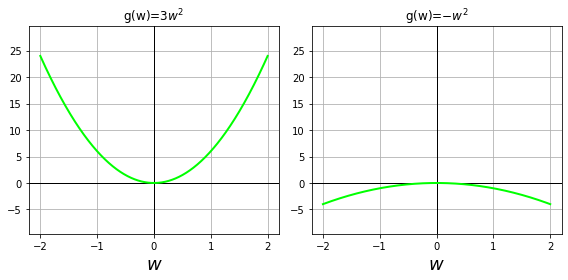

In [2]:
# create two quadratic functions
func1 = lambda w: 6*w**2 
func2 = lambda w: -w**2

# use custom plotter to show both functions
title1 = '$g(w)=$3w^2$'; title2 = '$g(w)=$-w^2$';
section_4_2_helpers.double_2d_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,fontsize = 18,color = 'lime')

In three dimensions - where we have two inputs $w_1$ and $w_2$ - the same quadratic formula can be defined using one of the inputs. For example, using $w_1$ the formula takes the form

\begin{equation}
g(w_1,w_2) =  a + bw_1^{\,} + cw_1^2 
\end{equation}

In three dimensions this looks precisely like $g(w) = a + bw_1^{\,} + cw_1^2$ stretched along the $w_2$ input dimension - forming a *half-pipe*. 

We plot the two and three dimensional versions of this quadratic side by side below.   

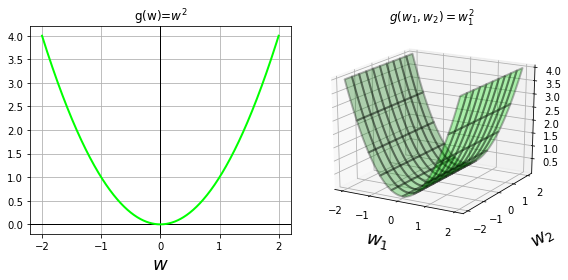

In [3]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: w**2 
func2 = lambda w: w[0]**2

# use custom plotter to show both functions
title1 = '$g(w)=$w^2$'; title2 = '$g(w_1,w_2)=w_1^2$';
section_4_2_helpers.double_2d3d_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,fontsize = 18,color = 'lime')

Certainly we can define this single input quadratic along any dimension we want. In general if we have $N$ possible inputs $\mathbf{w}=[w_1,\,w_2,\,\ldots,\,w_N]$ we can define it along the $n^{th}$ dimension as $g(\mathbf{w}) = a + bw_n^{\,} + cw_n^2$.

### Constructing multi-input quadratics when $N=2$

With multiple inputs we can form more complex quadratic functions by summing up a number of single input quadratics like the ones discussed above. For example, with $N=2$ inputs we can form two single input quadratics

\begin{array}
\
g_1\left(w_1^{\,},w_2^{\,}\right) = a_1^{\,} + b_1^{\,} w_1^{\,} + c_1^{\,} w_1^2  \\
g_2\left(w_1^{\,},w_2^{\,}\right) = a_2^{\,} + b_2^{\,} w_1^{\,} + c_2^{\,} w_1^2 \\
\end{array}

one along each input dimension.  Adding these together gives us a more complex quadratic $g(w_1,w_2) = g_1(w_1,w_2) + g_2(w_1,w_2)$ whose convexity/concavity along each input dimension is explicitly controlled by its corresponding single input quadratic.  

For example, below we plot the following single input quadratics

\begin{array}
\
g_1(w_1,w_2) = w_1^2  \\
g_2(w_1,w_2) = -w_2^2 \\
\end{array}

as well as their sum

\begin{equation}
g(w_1,w_2) = w_1^2 - w_2^2
\end{equation}

Because $g_1$ is convex, the sum $g$ is convex along the $w_1$ axis for any fixed value of $w_2$.  Conversely since $g_2$ is concave the sum $g$ is concave along the $w_2$ axis for any fixed value of $w_1$.

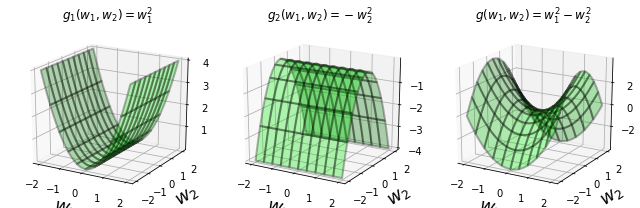

In [4]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: w[0]**2 
func2 = lambda w: -w[1]**2

# use custom plotter to show both functions
title1 = '$g_1(w_1,w_2)=w_1^2$'; title2 = '$g_2(w_1,w_2)=-w_2^2$'; title3 = '$g(w_1,w_2)=w_1^2-w_2^2$';
section_4_2_helpers.triple_3dsum_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,title3=title3,fontsize = 18,color = 'lime')

If instead we choose 

$$
\begin{array}
\
g_1(w_1,w_2) = w_1^2  \\
g_2(w_1,w_2) = w_2^2 \\
\end{array}
$$

and plot them along with their sum

$$g(w_1,w_2) = w_1^2 + w_2^2$$

we see that the sum is convex along each coordinate axis, since each individual single input quadratic was convex.

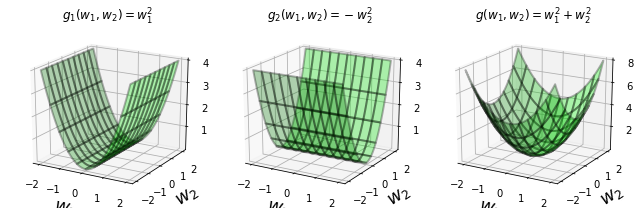

In [5]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: w[0]**2 
func2 = lambda w: w[1]**2

# use custom plotter to show both functions
title1 = '$g_1(w_1,w_2)=w_1^2$'; title2 = '$g_2(w_1,w_2)=-w_2^2$'; title3 = '$g(w_1,w_2)=w_1^2+w_2^2$';
section_4_2_helpers.triple_3dsum_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,title3=title3,fontsize = 18,color = 'lime') 

For fun in the next cell we animate a smooth transition between $g(w_1,w_2) = w_1^2 - w_2^2$ and $g(w_1,w_2) = w_1^2 + w_2^2$, that is, we gradually increase the coefficient on the $w_2^2$ from $-1$ to $+1$.

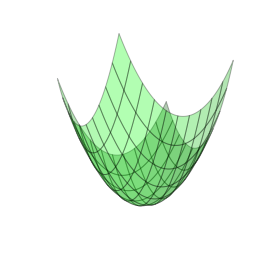

In [6]:
# animate a smooth transition between g = w_1^2 - w_2^2 and g = w_1^2 + w_2^2
# note: restart kernel if ggplot renderer has already been used (in any of the previous plots) before running - otherwise frames are very low resolutio
section_4_2_helpers.quadratic_3d_flexer.draw_it(savepath=video_path_1,num_slides = 100,fps=20)

In [7]:
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src='""" + video_path_1 + """' type="video/mp4">
  </video>
""")

---

The simple method detailed above for constructing multi-input quadratics can be used to produce every possible multi-input quadratic - up to orthogonal transformation (e.g., rotation) of the input. In other words by summing two single-input quadratics, and then possibly transforming the input using an orthogonal matrix, we can generate every possible multi-input quadratic.

To see how this is done lets first write our multi-input quadratic using vector/matrix notation. Summing two generic single-input quadratics gives us the general formula

\begin{equation}
g(w_1,w_2) = \left(a_1 + a_2\right) + \left(b_1 w_1 + b_2 w_2\right)  +  \left(c_1 w_1^2 + c_2 w_2^2 \right) 
\end{equation}

which we can write more compactly in vector/matrix notation as 

\begin{equation}
g(\mathbf{w}) = a_{\,}^{\,} + \mathbf{b}_{\,}^T \mathbf{w}_{\,}^{\,}  + \mathbf{w}^T \mathbf{C}_{\,}^{\,}  \mathbf{w}_{\,}^{\,} 
\end{equation}

where  $\mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$, $\mathbf{C} = \begin{bmatrix}
c_{1} \,\,\,\, 0 \\
\,\,0 \,\,\,\, c_{2} \\
\end{bmatrix}$, $\mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$, and $a = a_1 + a_2$.

Remember to transform any vector $\mathbf{w}$ using an orthogonal matrix $\mathbf{V}$ we simply left multiply: $\mathbf{V}\mathbf{w}$.

Substituting $\mathbf{Vw}$ for $\mathbf{w}$ in $g$ gives

\begin{equation}
g(\mathbf{Vw}) = a_{\,}^{\,} + \mathbf{b}_{\,}^T \left(\mathbf{Vw}_{\,}^{\,}\right) + \left(\mathbf{Vw}\right)^T \mathbf{C} \left(\mathbf{Vw}^{\,}\right)
\end{equation}

Combining terms here we can then write this equivalently as the function $\hat{g}$ where

\begin{equation}
\hat{g}(\mathbf{w})= a_{\,}^{\,} + \hat{\mathbf{b}}_{\,}^T \mathbf{w}^{\,} + \mathbf{w}^T \hat{\mathbf{C}} \mathbf{w}_{\,}^{\,}
\end{equation}

where $\hat{\mathbf{C}} = \mathbf{V}^T \mathbf{C} \mathbf{V}$ and $\hat{\mathbf{b}} = \mathbf{Vb}^T$.

For example, below we combine the two single-input quadratics 

$$
\begin{array}
\
g_1(w_1,w_2) = w_1^2  \\
g_2(w_1,w_2) = -w_2^2 \\
\end{array}
$$

and use the two-dimensional rotation matrix 

$$
\mathbf{V} = 
\begin{bmatrix}
\text{cos}(\theta) \,\,\,\, -\text{sin}(\theta) \\
\text{sin}(\theta) \,\,\,\,\,\,\,\,\,\, \text{cos}(\theta) \\
\end{bmatrix}
$$

over a range of values for $\theta$.  For each $\theta$ we have a rotated version of the original multi-input quadratic, shown when the slider is all the way to the left.

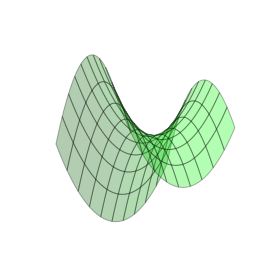

In [8]:
# rotate a quadratic 
# note: restart kernel if ggplot renderer has already been used (in any of the previous plots) before running - otherwise frames are very low resolutio
func = lambda w: w[0]**2 - w[1]**2
section_4_2_helpers.quadratic_3d_rotater.draw_it(savepath=video_path_2,func = func,num_slides = 100,color = 'lime',fps=20) 

In [9]:
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src='""" + video_path_2 + """' type="video/mp4">
  </video>
""")

### The general $N$ dimensional case

More generally for $N$ dimensional input we can define a single input quadratic along each dimension

\begin{array}
\
g_1(\mathbf{w}) = a_1 + b_1 w_1 + c_1 w_1^2  \\
g_2(\mathbf{w}) = a_2 + b_2 w_2 + c_2 w_2^2  \\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \vdots \\
g_N(\mathbf{w}) = a_N + b_N w_N + c_N w_N^2   \\
\end{array}

and summing them up as $g(\mathbf{w}) = \sum_{n=1}^N g_n(\mathbf{w})$ gives - collecting terms

\begin{equation}
g(\mathbf{w}) = \left(a_1 + a_2 + \cdots + a_N\right) + \left(b_1 w_1 + b_2 w_2 + \cdots + b_N w_N\right) + \left(c_1^{\,} w_1^2 + c_2^{\,} w_2^2 + \cdots + c_N^{\,} w_N^2\right) 
\end{equation}

We can write this formula more compactly using vector/matrix notation.  Denoting by $\mathbf{C}$ the $N\times N$ diagonal matrix

\begin{equation}
\mathbf{C} = \left[\begin{array}{cccc}
c_{1} & 0 & \cdots & 0\\
0 & c_{2} & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & c_{N}
\end{array}\right]
\end{equation}


$\mathbf{b}$ the $N\times 1$ vector

\begin{equation}
\mathbf{b} = 
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n 
\end{bmatrix}
\end{equation}

and the constant $a = \sum_{n=1}^N a_n$ we can write the sum of $N$ single input quadratics equivalently as

\begin{equation}
g(\mathbf{w}) = a + \mathbf{b}^T \mathbf{w} + \mathbf{w}^T \mathbf{C} \mathbf{w} 
\end{equation}

Then using any $N\times N$ orthogonal matrix $\mathbf{V}$ this quadratic can be transformed and we have

\begin{equation}
g(\mathbf{Vw}) = \hat{g}(\mathbf{w}) = a + \hat{\mathbf{b}}^T \mathbf{w} +  \mathbf{w}^T \hat{\mathbf{C}} \mathbf{w} 
\end{equation}

where $\hat{\mathbf{C}} = \mathbf{V}^T \mathbf{C} \mathbf{V}$ and $\hat{\mathbf{b}} = \mathbf{Vb}^T$.  Notice - importantly - that both the matrix $\mathbf{C}$ and the matrix $\hat{\mathbf{C}}$ are *symmetric*.   

This is an interesting fact regarding all quadratic functions that we examine more rigorously in the next Subsection: every multi-input quadratic function can be written in the general form $g(\mathbf{w}) = a + \mathbf{b}^T \mathbf{w} + \mathbf{w}^T \mathbf{C} \mathbf{w}$ where the $N\times N$ matrix $\mathbf{C}$ is symmetric.

> Every quadratic function taking in $N$ dimensional input $\mathbf{w}$ can be written in the general form $g(\mathbf{w}) = a + \mathbf{b}^T \mathbf{w} + \mathbf{w}^T \mathbf{C} \mathbf{w}$ where the $N\times N$ matrix $\mathbf{C}$ is symmetric.

## 4.2.2  Multi-input quadratics and eigenvalues

In this Section we show that every multi-input quadratic can be written in vector/matrix form as

\begin{equation}
g(\mathbf{w}) =  a + \mathbf{b}^T \mathbf{w}  +  \mathbf{w}^T \mathbf{C} \mathbf{w}
\end{equation}

where $\mathbf{C}$ is an $N\times N$ symmetric matrix, $\mathbf{b}$ is an $N\times 1$ vector, and $a$ is a constant.  Secondly we show that the convexity/concavity of a quadratic along its $n^{th}$ input is defined by the value of the $n^{th}$ eigenvalue of $\mathbf{C}$.  Finally we will see how this eigenvalue perspective is completely equivalent to how we previously described multi-input quadratics, as built from simple single-input quadratic functions.

### A jumping off point that leads right back to where we began

Looking at the vector/matrix equation for the quadratic we derived in the previous Section one might reasonably wonder what happens when $\mathbf{C}$ is not diagonal.  What happens if we start with this as our definition of a quadratic, and plug in a general $N\times N$ matrix of the form

\begin{equation}
\mathbf{C}=\left[\begin{array}{cccc}
c_{11} & c_{12} & \cdots & c_{1N}\\
c_{21} & c_{22} & \cdots & c_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
c_{N1} & c_{N2} & \cdots & c_{NN}
\end{array}\right]
\end{equation}

It seems perfectly reasonable to suspect that with such an $\mathbf{C}$ we could produce new as of yet unseen types of multi-input quadratics.  *But this suspicion is wrong, such a matrix produces a quadratic that is mathematically equivalent to the ones we have already seen, where the matrix $\mathbf{C}$ is diagonal.*   

Two short arguments can be made to verify this claim, which we now provide. Together these two arguments show that defining a multi-input quadratic using any generic $N\times N$ matrix $\mathbf{C}$ is completely equivalent to constructing it as a sum of simple single-input quadratics, as detailed in the previous Section.

---

##### Argument 1: a quadratic can always be reformulated so that $\mathbf{C}$ is a symmetric matrix

First note that because we are using $\mathbf{C}$ to define a quadratic, regardless of its form we can always re-write $\mathbf{C}$ as a *symmetric matrix*.

Lets quickly look at the general case when $N=2$, i.e., when 

\begin{equation}
\mathbf{C}=\left[\begin{array}{cc}
c_{11} & c_{12}\\
c_{21} & c_{22}
\end{array}\right]
\end{equation}

If we examine the vector/matrix equation for the quadratic $g(\mathbf{w}) = a + \mathbf{b}^T \mathbf{w}  +  \mathbf{w}^T \mathbf{C} \mathbf{w}$ notice that the only piece that creates cross-terms in the input - that is terms that involve both $w_1$ and $w_2$ together - lie in the product involving $\mathbf{C}$. In particular we have

\begin{equation}
\mathbf{w}^T\mathbf{C}\mathbf{w} = c_{11}w_1^2 + c_{12}w_1w_2 + c_{21}w_1w_2 + c_{22}w_2^2 
\end{equation}

Now notice that we can combine the cross terms involving $w_1w_2$ and write this equivalently as 

\begin{equation}
\mathbf{w}^T\mathbf{C}\mathbf{w} = c_{11}w_1^2 + 2\frac{c_{12} + c_{21}}{2}w_1w_2 + c_{22}w_2^2 
\end{equation}

which is the same result we would get if we replaced $\mathbf{A}$ with the symmetric matrix $\hat{\mathbf{A}}$ defined as 

\begin{equation}
\hat{\mathbf{C}}=\left[\begin{array}{cc}
c_{11} & \frac{c_{12}+c_{21}}{2}\\
\frac{c_{12}+c_{21}}{2} & c_{22}
\end{array}\right]
\end{equation}


and we indeed have $\mathbf{w}^T\hat{\mathbf{C}}\mathbf{w} = \mathbf{w}^T\mathbf{C}\mathbf{w}$.

The same sort of argument can be made regardless of the value of $N$, and so we can say that any quadratic can be written where the matrix $\mathbf{C}$ is symmetric.

---

##### Argument 2: the shape of a quadratic generated by a symmetric matrix $C$ is completely defined by the diagonal matrix containing its eigenvalues  

If $\mathbf{C}$ is symmetric then we know it can be diagonalized as

\begin{equation}
\mathbf{C} = \mathbf{V}\mathbf{D}\mathbf{V}^T
\end{equation}

where $\mathbf{V}$ is an $N\times N$ orthogonal matrix of eigenvectors, and $\mathbf{D}$ is a $N\times N$ diagonal matrix of real eigenvalues.  

Then replacing $\mathbf{C}$ with this matrix factorization and evaluating the quadratic $g$ at a general point $\mathbf{V}\mathbf{w}$ we have that

\begin{array}
\
g(\mathbf{\mathbf{V}w}) = a + \mathbf{b}^T \left(\mathbf{Vw}\right) + \left(\mathbf{Vw}\right)^T \mathbf{V}\mathbf{D}\mathbf{V}^T \left(\mathbf{Vw}\right)     \\
= a + \mathbf{b}^T \left(\mathbf{Vw}\right) + \mathbf{w}^T \mathbf{V}^T \mathbf{V}\mathbf{D}\mathbf{V}^T \mathbf{V}\mathbf{w}  \\
= a + \hat{\mathbf{b}}^T \mathbf{w} +  \mathbf{w}^T \mathbf{D}\mathbf{w}
\end{array}

where we have denoted $\hat{\mathbf{b}} = \mathbf{V}^T \mathbf{b}$.  

This shows that a quadratic with symmetric matrix $\mathbf{C}$ can indeed be equivalently written as a quadratic whose matrix is diagonal, and whose diagonal elements are the eigenvalues of $\mathbf{C}$.  